In [80]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
data = pd.read_csv('Intern Housing Data India.csv')

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [83]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [84]:
data.shape

(20640, 10)

In [85]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [86]:
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mean())

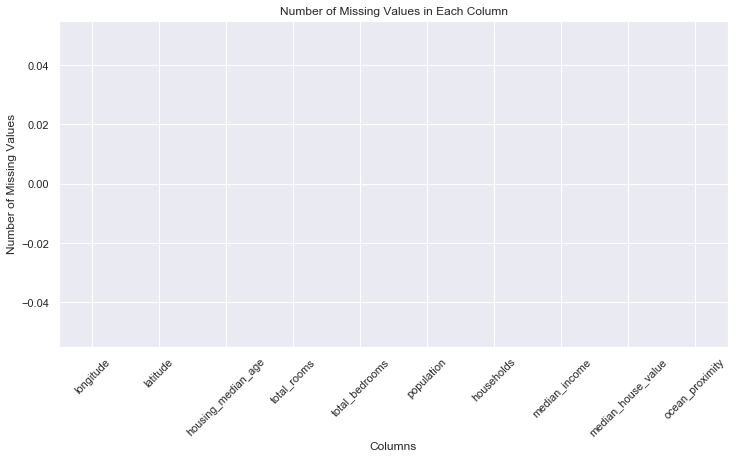

In [87]:
# Calculate the number of missing values in each column
missing_values = data.isnull().sum()

# Plotting the missing values
plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar', color='blue')
plt.title('Number of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()

In [88]:
# Getting the data that has at least 9 columns valid
data.dropna(thresh = 9,inplace=True)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [89]:
data.duplicated().sum()

0

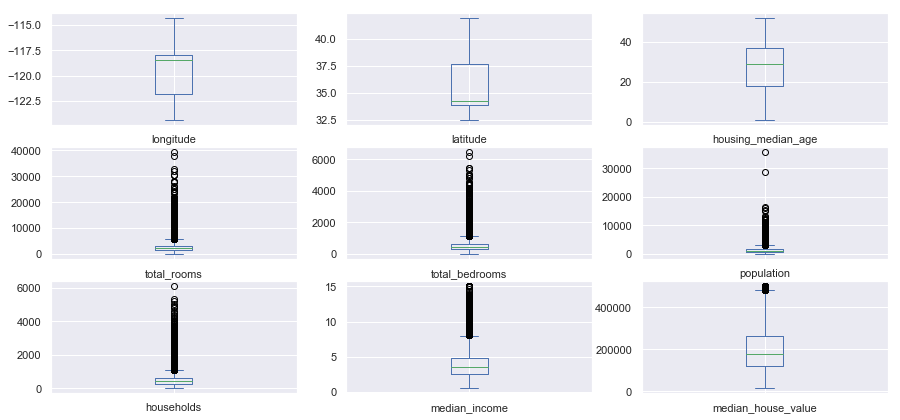

In [90]:
data.plot(kind='box', subplots=True, layout=(3,3), figsize=(15,7))
plt.show()

In [91]:
# Most of outlier are important for us so we can remove data bigger than 90% of column
data=data[data['total_rooms']<data['total_rooms'].quantile(0.9)]
data=data[data['total_bedrooms']<data['total_bedrooms'].quantile(0.9)]
data=data[data['population']<data['population'].quantile(0.9)]
data=data[data['households']<data['households'].quantile(0.9)]
data=data[data['median_income']<data['median_income'].quantile(0.9)]

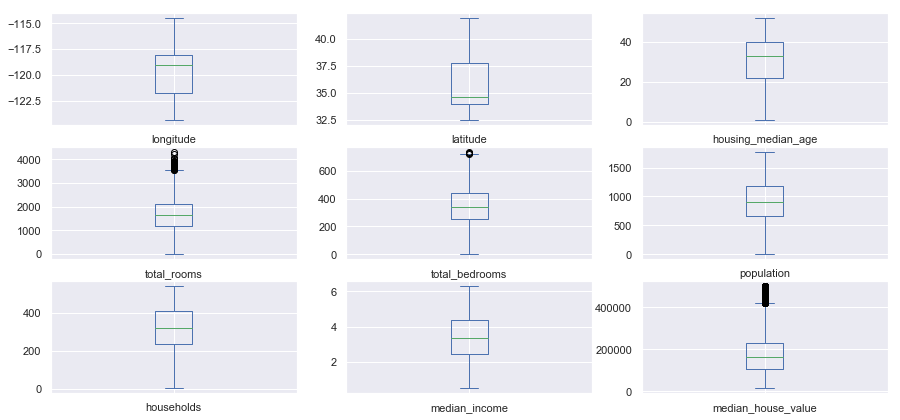

In [92]:
data.plot(kind='box', subplots=True, layout=(3,3), figsize=(15,7))
plt.show()

In [93]:
# Explore the column ocean_proximity
ocean_values = data["ocean_proximity"].value_counts()
ocean_values

<1H OCEAN     4979
INLAND        4333
NEAR OCEAN    1492
NEAR BAY      1357
ISLAND           5
Name: ocean_proximity, dtype: int64

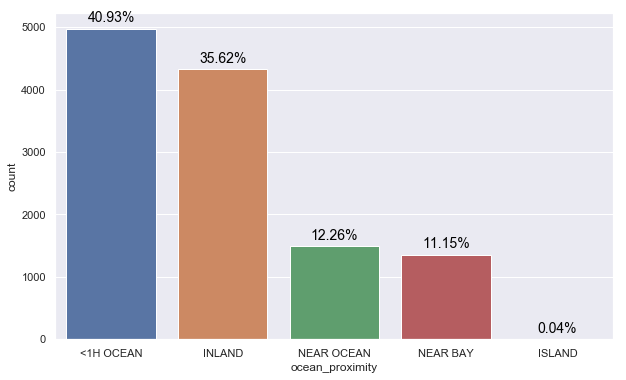

In [94]:
plt.figure(figsize=(10,6))
sns.countplot(x = "ocean_proximity",data=data,order=ocean_values.index)

# showing the percenotge
for i in range(ocean_values.shape[0]):
    count = ocean_values[i] 
    strt='{:0.2f}%'.format(100*count / data.shape[0]) 
    plt.text(i, count+100, strt, ha='center', color='black', fontsize=14) 

In [95]:
# Correlations

corr=data.corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.917909,-0.077269,-0.033747,0.006609,0.122599,0.014577,0.021728,-0.007677
latitude,-0.917909,1.000000,-0.045087,0.043957,-0.007109,-0.153719,-0.056128,-0.121693,-0.191968
housing_median_age,-0.077269,-0.045087,1.000000,-0.159579,-0.098980,-0.063760,-0.047324,-0.106234,0.154160
total_rooms,-0.033747,0.043957,-0.159579,1.000000,0.860157,0.696734,0.852419,0.342784,0.163923
total_bedrooms,0.006609,-0.007109,-0.098980,0.860157,1.000000,0.732851,0.920337,0.035463,0.076965
population,0.122599,-0.153719,-0.063760,0.696734,0.732851,1.000000,0.821882,0.054022,-0.072007
households,0.014577,-0.056128,-0.047324,0.852419,0.920337,0.821882,1.000000,0.100163,0.109257
median_income,0.021728,-0.121693,-0.106234,0.342784,0.035463,0.054022,0.100163,1.000000,0.574565
median_house_value,-0.007677,-0.191968,0.154160,0.163923,0.076965,-0.072007,0.109257,0.574565,1.000000


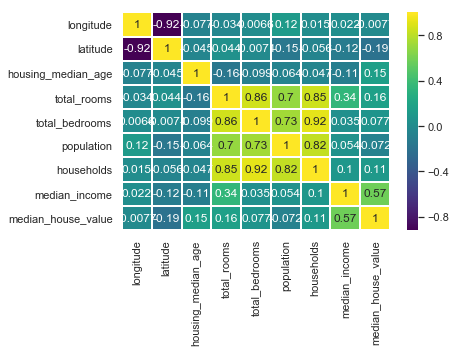

In [96]:
sns.heatmap(corr,annot=True,linewidths=1,cmap="viridis")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


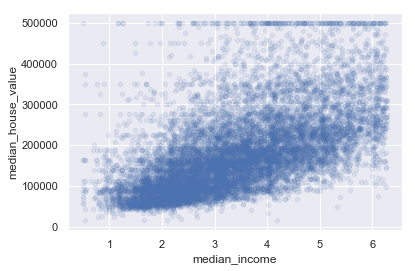

In [97]:
data.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

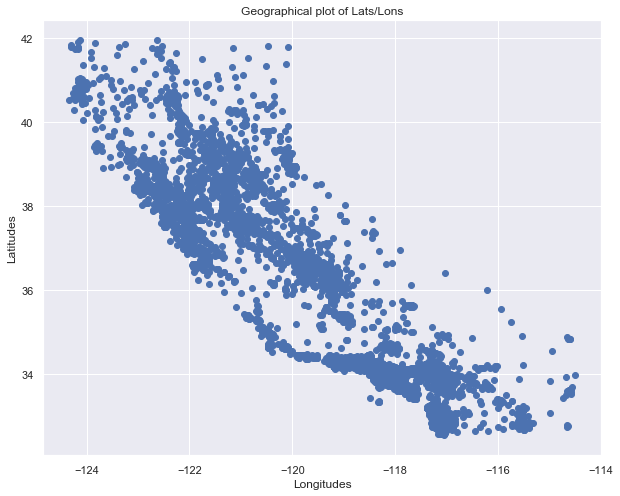

In [98]:
sns.set()
plt.figure(figsize=(10,8))#Figure size
plt.scatter('longitude','latitude',data=data)
plt.ylabel('Latitudes')
plt.xlabel('Longitudes')
plt.title('Geographical plot of Lats/Lons')
plt.show()

<Figure size 720x504 with 0 Axes>

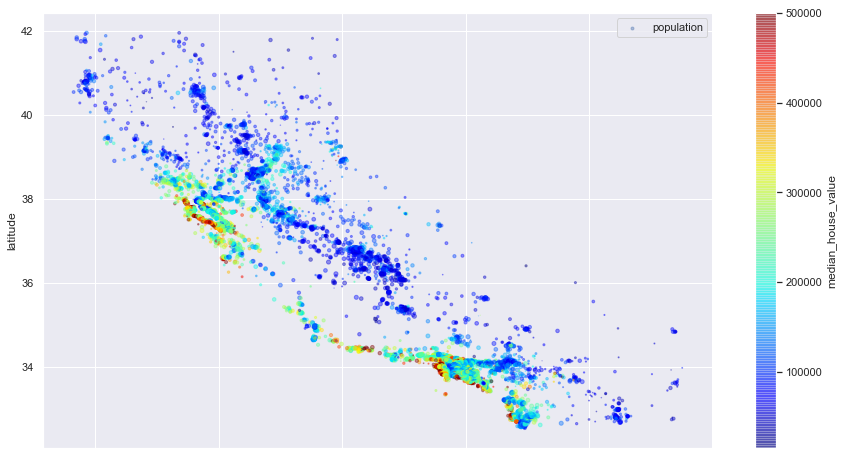

In [99]:
plt.figure(figsize=(10,7));
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=data["population"]/100, label="population", figsize=(15,8),
        c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True,
    );
plt.legend();

In [113]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [101]:
# Convert categorical variable `ocean_proximity` to numerical 
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)


In [102]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0,0,1,0
10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,0,0,1,0


In [103]:
# Prepare data for modeling
X = data.drop(columns=['median_house_value'])
y = data['median_house_value']

In [104]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [106]:
# Predictions and evaluation
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [108]:
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

RMSE: 48991.24
R²: 0.75


In [110]:
# Calculate percentage accuracy (predictions within 10% of actual values)
threshold = 0.1  # 10% threshold
relative_error = np.abs((y_test - y_pred) / y_test)
accuracy = np.mean(relative_error < threshold) * 100
accuracy

41.331142152834836

In [112]:
# Predict the price of a house for a given input
# Example input (replace these with actual values for prediction)
example_input = {
    "longitude": -122.23,
    "latitude": 37.88,
    "housing_median_age": 41.0,
    "total_rooms": 880.0,
    "total_bedrooms": 129.0,
    "population": 322.0,
    "households": 126.0,
    "median_income": 8.3252,
    "ocean_proximity_NEAR BAY": 1,  # Example encoding for categorical variable
    "ocean_proximity_INLAND": 0,
    "ocean_proximity_NEAR OCEAN": 0,
    "ocean_proximity_ISLAND": 0
}

# Convert example input into a DataFrame for prediction
import pandas as pd
input_df = pd.DataFrame([example_input])

# Align columns with the training data
for col in X_train.columns:
    if col not in input_df:
        input_df[col] = 0  # Add missing columns with default value 0

# Predict house price
predicted_price = model.predict(input_df)
print(f"Predicted House Price: {predicted_price[0]:,.2f}")

Predicted House Price: 198,561.00
